In [1]:
import os
import theano
import lasagne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import BatchIterator
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
    MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import softmax
from sklearn.preprocessing import MinMaxScaler, label_binarize

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled)


In [2]:
!pip2 freeze | grep "Theano\|Lasagne\|pandas\|scikit-learn\|matplotlib"

You are using pip version 8.0.2, however version 8.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Lasagne==0.2.dev1
matplotlib==1.5.1
pandas==0.17.0
scikit-learn==0.16.1
Theano==0.7.0


In [3]:
from IPython.display import Image
#Image('images/brown_surface.png') 
Image(filename='/home/celia/Code/agua_tierra_class/data/bdatos/1997_11_09/No agua 1997 11 09.jpg', width=900, height=350)


In [4]:
Image(filename='/home/celia/Code/agua_tierra_class/data/bdatos/1997_11_09/agua 1997 11 09.jpg', width=900, height=350)

#### Cargando los datos en pandas

In [5]:
!head data/rec\ 1a\ validacion\ Vanesa\ B\ 1\ 2\ 3\ 4\ 5\ 7\ \ S_.txt

In [7]:
import glob

all_files = glob.glob("data/*.txt")
frame = pd.DataFrame()
list_df = []
#for file_ in all_files:
map(lambda file_: list_df.append(pd.read_csv(file_,index_col=None, header=4, sep=';')), all_files)
frame = pd.concat(list_df, axis=0)
frame

banda 1  banda 2  banda 3  banda 4  banda 5  banda 7  salida
0         0.420    0.541    0.475    0.914    0.725    0.541       0
1         0.290    0.624    0.498    0.827    0.733    0.557       0
2         0.451    0.667    0.624    0.804    0.769    0.706       0
3         0.612    0.835    0.800    0.773    0.953    0.886       0
4         0.647    0.792    0.749    0.663    0.886    0.855       0
5         0.776    0.792    0.725    0.608    0.694    0.706       0
6         0.388    0.498    0.525    0.741    0.694    0.655       0
7         0.353    0.541    0.525    0.761    0.702    0.639       0
8         0.388    0.667    0.600    0.784    0.694    0.675       0
9         0.808    1.000    1.000    0.761    0.800    0.902       0
10        1.000    1.000    1.000    0.773    0.808    0.902       0
11        0.451    0.624    0.651    0.796    0.741    0.690       0
12        0.647    0.835    0.851    0.827    0.808    0.804       0
13        0.969    1.000    1.000    0.827    0.835    0.886       0
14        0.969    0.961    0.976    0.741    0.694    0.639       0
15        0.741    0.710    0.651    0.741    0.569    0.541       0
16        1.000    1.000    1.000    0.773    0.749    0.804       0
17        1.000    0.961    0.925    0.816    0.800    0.820       0
18        0.518    0.541    0.498    0.816    0.733    0.592       0
19        0.518    0.710    0.651    0.773    0.741    0.706       0
20        1.000    1.000    1.000    0.749    0.800    0.855       0
21        0.518    0.749    0.675    0.749    0.792    0.722       0
22        0.808    0.961    0.902    0.749    0.769    0.855       0
23        1.000    1.000    1.000    0.882    0.886    0.922       0
24        0.906    0.961    0.851    0.937    0.835    0.788       0
25        0.710    1.000    0.953    0.796    0.859    0.788       0
26        1.000    1.000    1.000    0.827    0.859    0.902       0
27        1.000    1.000    1.000    0.773    0.784    0.871       0
28        1.000    1.000    1.000    0.839    0.894    0.937       0
29        1.000    1.000    0.953    0.839    0.808    0.820       0
...         ...      ...      ...      ...      ...      ...     ...
999967    0.353    0.498    0.600    0.357    0.608    0.820       0
999968    0.322    0.416    0.576    0.412    0.608    0.804       0
999969    0.224    0.459    0.400    0.749    0.725    0.655       0
999970    0.094    0.416    0.325    0.851    0.659    0.541       0
999971    0.094    0.416    0.325    0.796    0.533    0.376       0
999972    0.129    0.459    0.373    0.749    0.533    0.475       0
999973    0.031    0.373    0.325    0.784    0.549    0.459       0
999974    0.063    0.416    0.349    0.839    0.498    0.392       0
999975    0.161    0.373    0.349    0.773    0.533    0.408       0
999976    0.161    0.373    0.349    0.773    0.533    0.408       0
999977    0.000    0.290    0.275    0.718    0.475    0.408       0
999978    0.031    0.290    0.325    0.698    0.475    0.361       0
999979    0.000    0.333    0.298    0.729    0.475    0.392       0
999980    0.094    0.373    0.349    0.675    0.525    0.408       0
999981    0.129    0.373    0.325    0.675    0.533    0.459       0
999982    0.094    0.373    0.373    0.608    0.549    0.475       0
999983    0.031    0.290    0.349    0.478    0.624    0.541       0
999984    0.224    0.416    0.498    0.565    0.675    0.608       0
999985    0.192    0.416    0.325    0.784    0.635    0.459       0
999986    0.063    0.373    0.325    0.804    0.498    0.345       0
999987    0.094    0.416    0.325    0.796    0.498    0.376       0
999988    0.063    0.373    0.298    0.804    0.490    0.325       0
999989    0.031    0.373    0.298    0.761    0.482    0.392       0
999990    0.063    0.373    0.275    0.761    0.498    0.392       0
999991    0.063    0.373    0.275    0.761    0.498    0.392       0
999992    0.063    0.373    0.298    0.773    0.518    0.392       0
999993

#### Extraemos valores del df y los llevamos a tipos y escalas aptas para la RN

In [8]:
X = frame[frame.columns[:-1]].values
X = X.astype(np.float32)

y = frame[frame.columns[-1]].values
y = y.astype(np.int32)


X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)

#### Analizamos forma/comportamiento de nuestros datos

In [9]:
from sklearn.decomposition import RandomizedPCA # using randomized Singular Value Decomposition 
Xp = RandomizedPCA(n_components=2, random_state=1).fit_transform(X)
Xp

array([[-0.15360342,  0.19812286],
       [-0.15545019,  0.18924918],
       [ 0.08558318,  0.23610364],
       ..., 
       [-0.49603698,  0.00925441],
       [-0.39281322,  0.04536371],
       [-0.40629182,  0.05966967]])

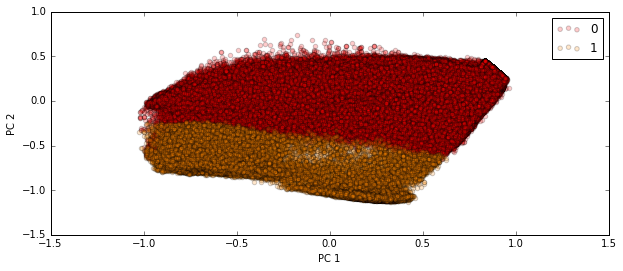

In [10]:
% matplotlib inline
import matplotlib.pyplot as plt

# get the product class 
product_class = np.unique(y)

colors = plt.get_cmap("hsv")

plt.figure(figsize=(10, 4))
for i, p in enumerate(product_class):
    mask = (y == p)
    plt.scatter(Xp[mask, 0], Xp[mask, 1], 
                c=colors(1. * i / 11), label=p, alpha=0.2)
    
plt.legend(loc="best")
plt.xlabel('PC 1')
plt.ylabel('PC 2')


#### Dividimos los datos que se usan para entrenamiento y para validación

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print "X_train.shape -> {}, X_test.shape -> {} ".format(X_train.shape,
                                                        X_test.shape)
print "y_train.shape -> {}, y_test.shape -> {} ".format(y_train.shape,
                                                        y_test.shape)
print X.min(), X.max()
print y.min(), y.max()

X_train.shape -> (2099993, 6), X_test.shape -> (899998, 6) 
y_train.shape -> (2099993,), y_test.shape -> (899998,) 
0.0 1.0
0 1


### Armando la red ...

In [13]:
layers_0 = [
                (InputLayer, {'shape': (None, 6)}),
                (DenseLayer, {'num_units': 100}),
                (DropoutLayer, {}),
                (DenseLayer, {'num_units': 100}),
                (DenseLayer, {'num_units': 2, 'nonlinearity': softmax}),
           ]

In [14]:
def create_network(npochs=50, batch_size=10000):
    return NeuralNet(
        layers=layers_0,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.01)),
        update_momentum=theano.shared(np.float32(0.9)),

        regression=False,
        batch_iterator_train=BatchIterator(batch_size=batch_size),
        on_epoch_finished=[
            #AdjustVariable('update_learning_rate', start=0.01, stop=0.001),
            #AdjustVariable('update_momentum', start=0.9, stop=0.9999)
        ],
        max_epochs=npochs,
        verbose=1)
net0 = create_network()

In [15]:
net0.fit(X_train, y_train)

# Neural Network with 11002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input0         6
  1  dense1       100
  2  dropout2     100
  3  dense3       100
  4  dense4         2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.13721       0.02162      6.34746      0.99467  2.71s
      2       0.02197       0.01071      2.05139      0.99664  2.69s
      3       0.01371       0.00760      1.80456      0.99724  2.69s
      4       0.01059       0.00618      1.71374      0.99756  2.71s
      5       0.00892       0.00543      1.64357      0.99778  2.71s
      6       0.00787       0.00497      1.58345      0.99792  2.72s
      7       0.00724       0.00468      1.54653      0.99803  2.71s
      8       0.00672       0.00446      1.50709      0.99810  2.70s
      9       0.00636       0.00431      1.47742      0.99817  2.71s
     10       0.

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f7c0c881c90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f7c0a784d50>,
     custom_score=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 6)}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 100}), (<class 'lasagne.layers.noise.DropoutLayer'>, {}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 100}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 2, 'nonlinearity': <function softmax at 0x7f7c1bf37320>})],
     loss=None, max_epochs=50, more_params={},
     objective=<function objective at 0x7f7c0c87e500>,
     objective_loss_function=<function categorical_crossentropy at 0x7f7c1befb1b8>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f7c0a702ea8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7f7c

#### Guardamos la red completa en ...

In [16]:
import cPickle as pickle

with open('data/aguatierra_simpleNN.pickle', 'wb') as f:
        pickle.dump(net0, f, -1)

#### Carguemos la red entrenada ..

In [17]:
import cPickle as pickle

net0 = None

fnames_nets = ['data/aguatierra_simpleNN.pickle']
nets = [net0]
for n, fnames in enumerate(fnames_nets):
    with open(fnames, 'rb') as f:
        nets[n] = pickle.load(f)

#### Veamos información de nuestra red *net0*

In [18]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

nets[0].verbose = 3
nets[0].initialize()
layer_info(nets[0])


# Neural Network with 11002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input0         6
  1  dense1       100
  2  dropout2     100
  3  dense3       100
  4  dense4         2



#### Verifiquemos el *loss plot* con valores de entrenamiento y validación

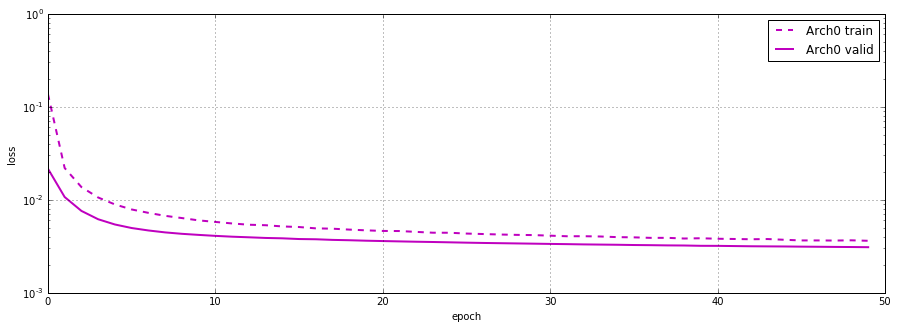

In [19]:
%matplotlib inline

plt.clf()
plt.figure(figsize=(15,5))
for net, net_name, color in zip(nets, ['Arch0'], ['m']):
    train_loss = np.array([i["train_loss"] for i in net.train_history_])
    valid_loss = np.array([i["valid_loss"] for i in net.train_history_])
    plt.plot(train_loss, '--{}'.format(color), linewidth=2, label="{} train".format(net_name))
    plt.plot(valid_loss, '-{}'.format(color), linewidth=2, label="{} valid".format(net_name))

plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#### Veamos la performance de la red neuronal ..

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import cross_validation
for net in nets:
    y_pred = net.predict(X)
    print classification_report(y, y_pred)
    print "[Test dataset] Score: %.5f" % net.score(X_test, y_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   2665464
          1       0.99      1.00      0.99    334527

avg / total       1.00      1.00      1.00   2999991

[Test dataset] Score: 0.99872


In [21]:
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=3, test_size=0.2, random_state=0)
print cross_validation.cross_val_score(net, X, y, cv=cv)

# Neural Network with 11002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input0         6
  1  dense1       100
  2  dropout2     100
  3  dense3       100
  4  dense4         2

# Neural Network with 11002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input0         6
  1  dense1       100
  2  dropout2     100
  3  dense3       100
  4  dense4         2

      1       0.12434       0.01919      6.47937      0.99569  3.19s
  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.12434       0.01919      6.47937      0.99569  3.19s
      2       0.01968       0.00944      2.08468      0.99702  3.18s
      2       0.01968       0.00944      2.08468      0.99702  3.18s
      3       0.01242       0.00691      1.79590      0.99744  3.17s
      3       0.01242       0.00691      1.79590      0.99744  3.

In [24]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
    plt.clf()
    plt.imshow(confusion_matrix(y_test, clf.predict(X_test)),
               interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

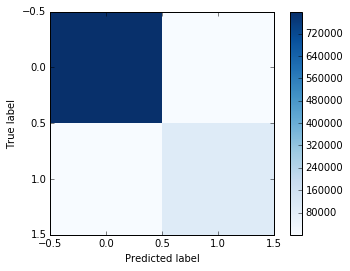

In [25]:
plot_matrix(nets[0], X_test, y_test)

In [26]:
confusion_matrix(y_test, nets[0].predict(X_test))

array([[799095,    705],
       [   446,  99752]])

#### Ahora probemos con datos de otras imagenes ...

In [27]:
!less "data/bdatos/1997_11_09/no agua 1 1997 11 09.txt"

x;y;rotulo;agua/noagua ==> 1/0;banda 1;banda 2;banda 3;banda 4;banda 5;banda 7;
1789;106;1;0;0,216;0,471;0,357;0,957;0,576;0,365;
1790;106;1;0;0,216;0,471;0,286;0,949;0,565;0,345;
1791;106;1;0;0,235;0,439;0,286;0,984;0,545;0,306;
1792;106;1;0;0,216;0,439;0,286;1;0,545;0,306;
1793;106;1;0;0,196;0,439;0,286;1;0,553;0,286;
1794;106;1;0;0,196;0,439;0,286;1;0,565;0,325;
1795;106;1;0;0,196;0,439;0,286;1;0,553;0,345;
1796;106;1;0;0,196;0,439;0,286;1;0,553;0,306;
1797;106;1;0;0,216;0,439;0,267;1;0,565;0,325;
1798;106;1;0;0,196;0,439;0,243;1;0,565;0,325;
1799;106;1;0;0,196;0,439;0,243;1;0,565;0,325;
1800;106;1;0;0,196;0,412;0,267;1;0,545;0,325;
1801;106;1;0;0,216;0,412;0,286;1;0,553;0,345;
1802;106;1;0;0,314;0,588;0,49;0,831;0,655;0,463;
1803;106;1;0;0,333;0,588;0,557;0,749;0,663;0,482;
1804;106;1;0;0,216;0,471;0,357;0,741;0,596;0,424;
1805;106;1;0;0,196;0,471;0,357;0,702;0,565;0,424;
1806;106;1;0;0,196;0,471;0,376;0,686;0,596;0,404;
1807;106;1;0;0,235;0,498;0,4;0,722;0,604;0,424;
1808;106;1;0;

In [29]:
to_use = ['agua/noagua ==> 1/0', 'banda 1', 'banda 2', 'banda 3', 'banda 4', 'banda 5', 'banda 7']

In [30]:
df_test = pd.read_csv("data/bdatos/1997_11_09/no agua 1 1997 11 09.txt", decimal=',',sep=';', usecols=to_use)
df_test

agua/noagua ==> 1/0  banda 1  banda 2  banda 3  banda 4  banda 5  \
0                         0    0.216    0.471    0.357    0.957    0.576   
1                         0    0.216    0.471    0.286    0.949    0.565   
2                         0    0.235    0.439    0.286    0.984    0.545   
3                         0    0.216    0.439    0.286    1.000    0.545   
4                         0    0.196    0.439    0.286    1.000    0.553   
5                         0    0.196    0.439    0.286    1.000    0.565   
6                         0    0.196    0.439    0.286    1.000    0.553   
7                         0    0.196    0.439    0.286    1.000    0.553   
8                         0    0.216    0.439    0.267    1.000    0.565   
9                         0    0.196    0.439    0.243    1.000    0.565   
10                        0    0.196    0.439    0.243    1.000    0.565   
11                        0    0.196    0.412    0.267    1.000    0.545   
12                        0    0.216    0.412    0.286    1.000    0.553   
13                        0    0.314    0.588    0.490    0.831    0.655   
14                        0    0.333    0.588    0.557    0.749    0.663   
15                        0    0.216    0.471    0.357    0.741    0.596   
16                        0    0.196    0.471    0.357    0.702    0.565   
17                        0    0.196    0.471    0.376    0.686    0.596   
18                        0    0.235    0.498    0.400    0.722    0.604   
19                        0    0.235    0.498    0.400    0.769    0.616   
20                        0    0.216    0.498    0.400    0.757    0.604   
21                        0    0.176    0.471    0.400    0.749    0.624   
22                        0    0.255    0.498    0.424    0.757    0.635   
23                        0    0.255    0.498    0.400    0.784    0.635   
24                        0    0.294    0.439    0.357    0.804    0.616   
25                        0    0.235    0.471    0.357    0.812    0.604   
26                        0    0.235    0.498    0.357    0.831    0.616   
27                        0    0.196    0.498    0.376    0.839    0.624   
28                        0    0.235    0.498    0.376    0.831    0.635   
29                        0    0.255    0.498    0.400    0.792    0.643   
...                     ...      ...      ...      ...      ...      ...   
705932                    0    0.333    0.498    0.557    0.702    0.804   
705933                    0    0.314    0.529    0.557    0.596    0.812   
705934                    0    0.314    0.498    0.576    0.631    0.843   
705935                    0    0.314    0.471    0.533    0.651    0.773   
705936                    0    0.314    0.471    0.510    0.675    0.792   
705937                    0    0.294    0.471    0.490    0.639    0.792   
705938                    0    0.294    0.498    0.533    0.659    0.843   
705939                    0    0.275    0.439    0.533    0.694    0.792   
705940                    0    0.275    0.471    0.490    0.651    0.784   
705941                    0    0.314    0.471    0.490    0.675    0.784   
705942                    0    0.314    0.439    0.443    0.596    0.733   
705943                    0    0.686    0.706    0.333    1.000    0.000   
705944                    0    0.627    0.882    1.000    1.000    0.000   
705945                    0    0.667    0.647    0.243    1.000    0.000   
705946                    0    0.784    0.620    0.267    1.000    0.000   
705947                    0    0.588    0.561    0.267    1.000    0.000   
705948                    0    0.647    1.000    0.980    1.000    0.000   
705949                    0    0.608    0.529    0.243    1.000    0.000   
705950                    0    0.647    0.588    0.133    1.000    0.000   
705951                    0    0.745    1.000    0.200    1.000    0.000   
705952                    0    0.451    0.765    0.133  

In [31]:
X = df_test[df_test.columns[1:]].values
X = X.astype(np.float32)
y = df_test[df_test.columns[0]].values
y = y.astype(np.int32)


X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)

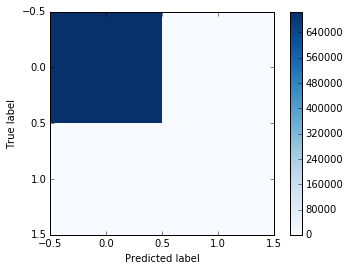

In [32]:
plot_matrix(nets[0], X, y)

In [34]:
print confusion_matrix(y, nets[0].predict(X))
print classification_report(y, nets[0].predict(X))

[[705899     63]
 [     0      0]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    705962
          1       0.00      0.00      0.00         0

avg / total       1.00      1.00      1.00    705962



/usr/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
